In [10]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from jh_utils.data.sql.object import create_object_DB_by_envfile
from jh_utils.utils.time import Timer
from statsmodels.tsa import stattools as st
from statsmodels.graphics import tsaplots as tsaplots

In [11]:
db_ob = create_object_DB_by_envfile('../../api/.env')

In [6]:
query = "select * from raw.southeast s where s.station_code ='A612';"
df = pd.read_sql_query(query, db_ob.engine())

In [12]:
query = "select * from collected where station='A612'"
df = pd.read_sql_query(query, db_ob.engine())

In [8]:
df

,Data,Hora,"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),RADIACAO GLOBAL (Kj/m²),"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",TEMPERATURA DO PONTO DE ORVALHO (°C),TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C),...,"VENTO, DIREÇÃO HORARIA (gr) (° (gr))","VENTO, RAJADA MAXIMA (m/s)","VENTO, VELOCIDADE HORARIA (m/s)",region,state,station,station_code,latitude,longitude,height
0,2023-01-01,00:00,0.0,1017.5,1017.5,1016.8,-9999.0,25.0,21.6,25.5,...,347.0,3.3,0.8,SE,ES,VITORIA,A612,-20.270833,-40.305833,9.0
1,2023-01-01,01:00,0.0,1017.7,1017.9,1017.5,-9999.0,24.1,22.2,25.0,...,339.0,2.0,0.6,SE,ES,VITORIA,A612,-20.270833,-40.305833,9.0
2,2023-01-01,02:00,0.0,1017.2,1017.7,1017.2,-9999.0,24.3,21.7,24.5,...,343.0,2.7,0.9,SE,ES,VITORIA,A612,-20.270833,-40.305833,9.0
3,2023-01-01,03:00,0.0,1016.7,1017.2,1016.6,-9999.0,24.6,21.1,24.7,...,328.0,2.6,0.6,SE,ES,VITORIA,A612,-20.270833,-40.305833,9.0
4,2023-01-01,04:00,0.0,1016.0,1016.7,1016.0,-9999.0,23.5,21.9,24.6,...,315.0,1.5,0.5,SE,ES,VITORIA,A612,-20.270833,-40.305833,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150499,2022-10-31,10:00,0.0,1011.1,1011.3,1010.8,230.4,25.0,21.0,25.0,...,7.0,5.9,1.2,SE,ES,VITORIA,A612,-20.270833,-40.305833,9.0
150500,2022-10-31,11:00,0.0,1011.3,1011.4,1011.1,547.6,26.1,20.9,26.1,...,12.0,5.6,2.0,SE,ES,VITORIA,A612,-20.270833,-40.305833,9.0
150501,2022-10-31,12:00,0.0,1011.9,1011.9,1011.3,1062.7,27.6,21.1,27.6,...,10.0,6.4,1.8,SE,ES,VITORIA,A612,-20.270833,-40.305833,9.0
150502,2022-10-31,13:00,0.0,1011.7,1011.9,1011.7,853.8,27.7,20.3,27.7,...,22.0,6.5,1.8,SE,ES,VITORIA,A612,-20.270833,-40.305833,9.0


In [13]:
df.columns

Index(['Data', 'Hora', 'PRECIPITAÇÃO TOTAL, HORÁRIO (mm)',
       'PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)',
       'PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)',
       'PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)',
       'RADIACAO GLOBAL (Kj/m²)',
       'TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)',
       'TEMPERATURA DO PONTO DE ORVALHO (°C)',
       'TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)',
       'TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C)',
       'TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C)',
       'TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C)',
       'UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)',
       'UMIDADE REL. MIN. NA HORA ANT. (AUT) (%)',
       'UMIDADE RELATIVA DO AR, HORARIA (%)',
       'VENTO, DIREÇÃO HORARIA (gr) (° (gr))', 'VENTO, RAJADA MAXIMA (m/s)',
       'VENTO, VELOCIDADE HORARIA (m/s)', 'region', 'state', 'station',
       'station_code', 'latitude', 'longitude', 'height'],
      dtype='object')

In [34]:
x = df['radiacao global (kj/m2)']
y = df['precipitacao total, horario (mm)']

In [15]:
df.groupby('Hora').max()['RADIACAO GLOBAL (Kj/m²)']

Hora
00:00       6.2
01:00       2.6
02:00       5.7
03:00       2.8
04:00       5.2
05:00       6.5
06:00       4.0
07:00       5.1
08:00      29.2
09:00     545.6
10:00    1628.3
11:00    2719.4
12:00    3272.5
13:00    3838.9
14:00    4193.5
15:00    4146.5
16:00    4060.2
17:00    3829.4
18:00    3225.9
19:00    2659.6
20:00    1738.0
21:00     660.4
22:00      44.2
23:00       4.5
Name: RADIACAO GLOBAL (Kj/m²), dtype: float64

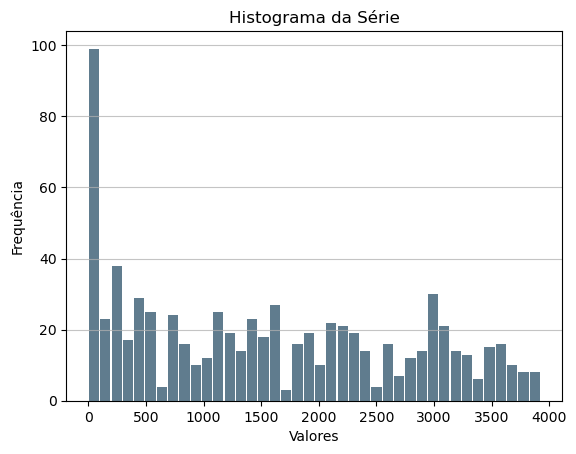

In [36]:
x.hist(grid=False, bins=40, rwidth=0.9, color='#607c8e')
plt.title('Histograma da Série')
plt.xlabel('Valores')
plt.ylabel('Frequência')
plt.grid(axis='y', alpha=0.75)
plt.show()

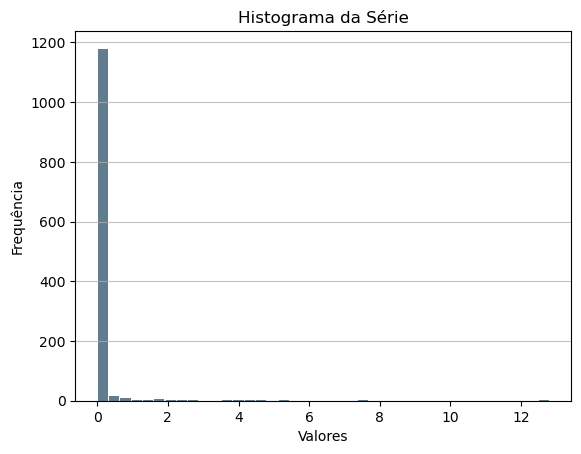

In [37]:
y.hist(grid=False, bins=40, rwidth=0.9, color='#607c8e')
plt.title('Histograma da Série')
plt.xlabel('Valores')
plt.ylabel('Frequência')
plt.grid(axis='y', alpha=0.75)
plt.show()

In [38]:
def plot(s):
    s = s[s != 0]
    s.hist(grid=False, bins=20, rwidth=0.9, color='#607c8e')
    plt.title('Histograma da Série')
    plt.xlabel('Valores')
    plt.ylabel('Frequência')
    plt.grid(axis='y', alpha=0.75)
    plt.show()

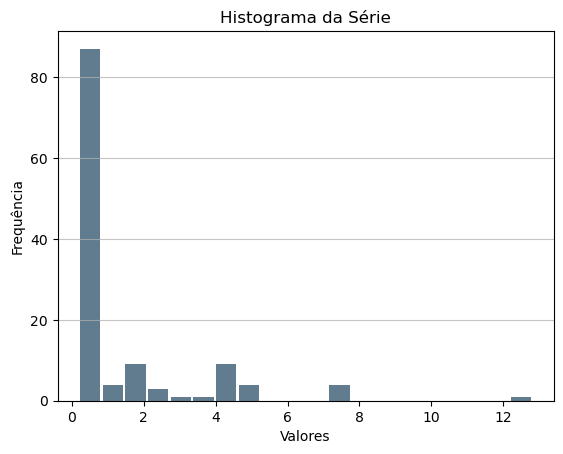

In [39]:
plot(y)

In [ ]:
# radiaćão -> precipitaćão total
# temperatura

In [45]:
df['data'] = pd.to_datetime(df['data'], format='%d/%m/%Y')
df['hora'] = pd.to_timedelta(df['hora'].astype(str) + ':00')
df['data_hora'] = df['data'] + df['hora']
df.set_index('data_hora', inplace=True)

In [46]:
df

,data,hora,"temperatura do ar - bulbo seco, horaria (°c)",temperatura maxima na hora ant. (aut) (°c),temperatura minima na hora ant. (aut) (°c),"umidade relativa do ar, horaria (%)",umidade rel. max. na hora ant. (aut) (%),umidade rel. min. na hora ant. (aut) (%),temperatura do ponto de orvalho (°c),temperatura orvalho max. na hora ant. (aut) (°c),temperatura orvalho min. na hora ant. (aut) (°c),"pressao atmosferica ao nivel da estacao, horaria (mb)",pressao atmosferica max. na hora ant. (aut) (mb),pressao atmosferica min. na hora ant. (aut) (mb),vento direcao horaria (gr) (° (gr)),vento rajada maxima (m/s),vento velocidade horaria (m/s),radiacao global (kj/m2),"precipitacao total, horario (mm)",station
data_hora,,,,,,,,,,,,,,,,,,,,
2024-01-15 00:00:00,2024-01-15,0 days 00:00:00,26.6,26.7,26.5,75.0,76.0,74.0,21.7,21.9,21.7,1014.9,1014.9,1014.4,1.8,353.0,6.3,NaN,0.0,A612
2024-01-15 01:00:00,2024-01-15,0 days 01:00:00,26.8,27.0,26.6,73.0,75.0,72.0,21.5,21.8,21.4,1015.2,1015.2,1014.9,1.7,353.0,6.1,NaN,0.0,A612
2024-01-15 02:00:00,2024-01-15,0 days 02:00:00,26.5,26.8,26.5,74.0,75.0,73.0,21.6,21.8,21.4,1015.0,1015.2,1015.0,1.8,344.0,6.6,NaN,0.0,A612
2024-01-15 03:00:00,2024-01-15,0 days 03:00:00,26.8,26.9,26.4,72.0,75.0,72.0,21.3,21.6,21.3,1015.1,1015.1,1014.9,1.3,350.0,5.6,NaN,0.0,A612
2024-01-15 04:00:00,2024-01-15,0 days 04:00:00,26.3,26.9,26.2,73.0,74.0,71.0,21.0,21.4,21.0,1015.0,1015.2,1015.0,1.2,340.0,5.3,NaN,0.0,A612
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-08 18:00:00,2024-02-08,0 days 18:00:00,29.5,30.2,29.2,65.0,67.0,60.0,22.3,22.9,21.6,1012.0,1012.4,1012.0,3.0,45.0,7.6,1444.6,0.0,A612
2024-02-08 19:00:00,2024-02-08,0 days 19:00:00,30.6,30.9,29.1,57.0,66.0,56.0,21.1,22.5,21.0,1011.9,1012.3,1011.9,2.0,5.0,7.6,1503.9,0.0,A612
2024-02-08 20:00:00,2024-02-08,0 days 20:00:00,28.8,30.7,28.8,61.0,63.0,57.0,20.5,21.8,20.4,1011.8,1011.9,1011.6,2.1,16.0,6.3,898.0,0.0,A612


In [47]:
df['data'] = pd.to_datetime(df['data'], format='%d/%m/%Y')
df['hora'] = pd.to_timedelta(df['hora'].astype(str) + ':00')
df['data_hora'] = df['data'] + df['hora']
df.set_index('data_hora', inplace=True)

ValueError: expected hh:mm:ss format

In [40]:
df.shape

,data,hora,"temperatura do ar - bulbo seco, horaria (°c)",temperatura maxima na hora ant. (aut) (°c),temperatura minima na hora ant. (aut) (°c),"umidade relativa do ar, horaria (%)",umidade rel. max. na hora ant. (aut) (%),umidade rel. min. na hora ant. (aut) (%),temperatura do ponto de orvalho (°c),temperatura orvalho max. na hora ant. (aut) (°c),temperatura orvalho min. na hora ant. (aut) (°c),"pressao atmosferica ao nivel da estacao, horaria (mb)",pressao atmosferica max. na hora ant. (aut) (mb),pressao atmosferica min. na hora ant. (aut) (mb),vento direcao horaria (gr) (° (gr)),vento rajada maxima (m/s),vento velocidade horaria (m/s),radiacao global (kj/m2),"precipitacao total, horario (mm)",station
0,15/01/2024,00:00,26.6,26.7,26.5,75.0,76.0,74.0,21.7,21.9,21.7,1014.9,1014.9,1014.4,1.8,353.0,6.3,NaN,0.0,A612
1,15/01/2024,01:00,26.8,27.0,26.6,73.0,75.0,72.0,21.5,21.8,21.4,1015.2,1015.2,1014.9,1.7,353.0,6.1,NaN,0.0,A612
2,15/01/2024,02:00,26.5,26.8,26.5,74.0,75.0,73.0,21.6,21.8,21.4,1015.0,1015.2,1015.0,1.8,344.0,6.6,NaN,0.0,A612
3,15/01/2024,03:00,26.8,26.9,26.4,72.0,75.0,72.0,21.3,21.6,21.3,1015.1,1015.1,1014.9,1.3,350.0,5.6,NaN,0.0,A612
4,15/01/2024,04:00,26.3,26.9,26.2,73.0,74.0,71.0,21.0,21.4,21.0,1015.0,1015.2,1015.0,1.2,340.0,5.3,NaN,0.0,A612
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1234,08/02/2024,18:00,29.5,30.2,29.2,65.0,67.0,60.0,22.3,22.9,21.6,1012.0,1012.4,1012.0,3.0,45.0,7.6,1444.6,0.0,A612
1235,08/02/2024,19:00,30.6,30.9,29.1,57.0,66.0,56.0,21.1,22.5,21.0,1011.9,1012.3,1011.9,2.0,5.0,7.6,1503.9,0.0,A612
1236,08/02/2024,20:00,28.8,30.7,28.8,61.0,63.0,57.0,20.5,21.8,20.4,1011.8,1011.9,1011.6,2.1,16.0,6.3,898.0,0.0,A612
1237,08/02/2024,21:00,28.0,28.8,28.0,64.0,67.0,61.0,20.5,21.4,20.4,1012.4,1012.4,1011.8,1.8,13.0,5.6,230.3,0.0,A612


In [43]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Suponha que 'df' é o seu DataFrame e 'date' é a sua coluna de data
df['data'] = pd.to_datetime(df['data'])
df.set_index('date', inplace=True)

# Suponha que 'value' é a coluna que você quer modelar
y = df['value']

# Defina os parâmetros do modelo SARIMA
# Estes podem precisar ser ajustados dependendo dos seus dados
order = (1, 0, 1)
seasonal_order = (1, 1, 0, 24)  # 24 períodos por dia para dados horários

# Crie e ajuste o modelo
model = SARIMAX(y, order=order, seasonal_order=seasonal_order)
model_fit = model.fit(disp=False)

# Adicione uma coluna para a tendência mensal
df['month'] = df.index.month
df['trend'] = df.groupby('month')['value'].transform('mean')

# Subtraia a tendência mensal dos dados originais
df['deseasonalized'] = df['value'] - df['trend']

# Agora você pode modelar 'deseasonalized' com um modelo SARIMA

/tmp/ipykernel_120174/3760336453.py:5: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['data'] = pd.to_datetime(df['data'])


KeyError: "None of ['date'] are in the columns"

In [ ]:
df['hour_9'] = df['hour'].apply(lambda x: (x-9)%24)
df['hour_9**2'] = df['hour_9']**2
df['hour_9**3'] = df['hour_9']**3

In [49]:
df.index.dayofyear

Index([15, 15, 15, 15, 15, 15, 15, 15, 15, 15,
       ...
       39, 39, 39, 39, 39, 39, 39, 39, 39, 39],
      dtype='int32', name='data_hora', length=1239)

In [50]:
df['dia_do_ano'] = df.index.dayofyear

In [52]:
media_por_dia = df.groupby('dia_do_ano')['temperatura minima na hora ant. (aut) (°c)'].mean()

In [54]:
media_por_dia

dia_do_ano
15    28.291667
17    28.322727
18    28.000000
19    28.522727
20    28.691304
21    26.021739
22    25.339130
23    25.269565
24    23.639130
25    25.059091
26    25.581818
27    25.721739
29    27.365517
30    26.278906
31    26.131034
32    27.241379
33    26.402299
34    26.304598
35    26.832911
36    26.526437
37    27.376562
38    25.637931
39    26.908046
Name: temperatura minima na hora ant. (aut) (°c), dtype: float64

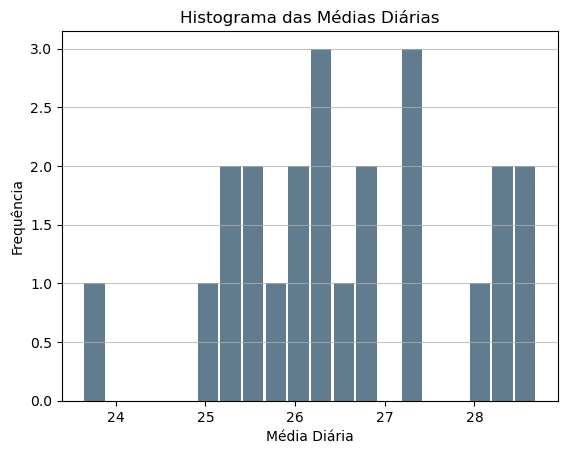

In [53]:
media_por_dia.hist(grid=False, bins=20, rwidth=0.9, color='#607c8e')
plt.title('Histograma das Médias Diárias')
plt.xlabel('Média Diária')
plt.ylabel('Frequência')
plt.grid(axis='y', alpha=0.75)
plt.show()